Take a look at how observations following up ToO events executed.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import healpy as hp

import rubin_sim.maf as maf
import rubin_sim.utils as rsUtils

import sqlite3
import pandas as pd

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying table None with constraint note like "%%ToO%%" for columns ['night', 'fieldDec', 'fieldRA', 'rotSkyPos']
Found 13039 visits
Running:  ['too_rate10_v2_0_10yrs_Count_night_note_like_ToO_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint note like "%ToO%" and night < 730.000000 for columns ['night', 'fieldDec', 'fieldRA', 'rotSkyPos']
Found 2693 visits
Running:  ['too_rate10_v2_0_10yrs_Count_night_note_like_ToO_and_night_lt_730_000000_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint note like "%ToO%" and night < 365.000000 and filter="g" for columns ['fiveSigmaDepth', 'fieldDec', 'fieldRA', 'rotSkyPos']
Found 413 visits
Running:  ['too_rate10_v2_0_10yrs_Mean_fiveSigmaDepth_note_like_ToO_and_night_lt_365_000000_and_g_HEAL']


0.0 180.0 -180.0 180.0


Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "note like "%%ToO%%"" constraint now.
Plotting complete.
Plotting figures with "note like "%ToO%" and night < 730.000000" constraint now.


0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0


Plotting complete.
Plotting figures with "note like "%ToO%" and night < 365.000000 and filter="g"" constraint now.
Plotting complete.
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying table None with constraint note like "%%ToO%%" for columns ['night', 'fieldDec', 'fieldRA', 'rotSkyPos']
Found 56877 visits
Running:  ['too_rate50_v2_0_10yrs_Count_night_note_like_ToO_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint note like "%ToO%" and night < 730.000000 for columns ['night', 'fieldDec', 'fieldRA', 'rotSkyPos']
Found 13012 visits
Running:  ['too_rate50_v2_0_10yrs_Count_night_note_like_ToO_and_night_lt_730_000000_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint note like "%ToO%" and night < 365.000000 and filter="g" for columns ['fiveSigmaDepth', 'fieldDec', 'fieldRA', 'rotSkyPos']
Fo

0.0 180.0 -180.0 180.0


Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "note like "%%ToO%%"" constraint now.


0.0 180.0 -180.0 180.0


Plotting complete.
Plotting figures with "note like "%ToO%" and night < 730.000000" constraint now.


0.0 180.0 -180.0 180.0


Plotting complete.
Plotting figures with "note like "%ToO%" and night < 365.000000 and filter="g"" constraint now.
Plotting complete.


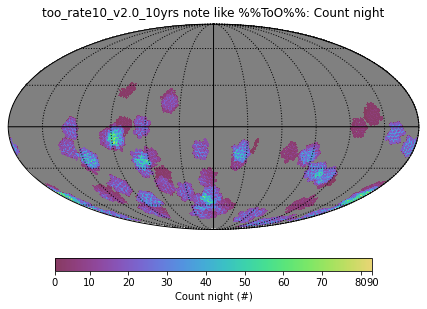

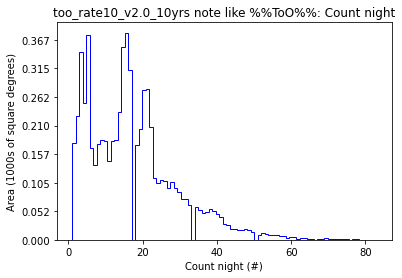

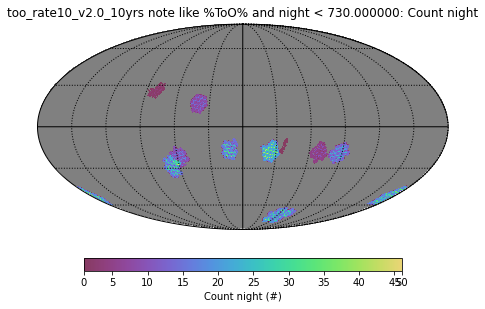

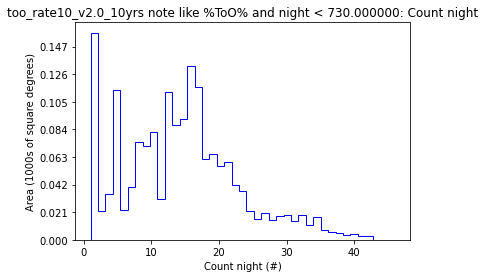

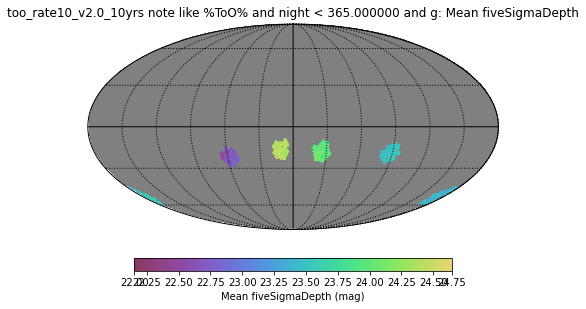

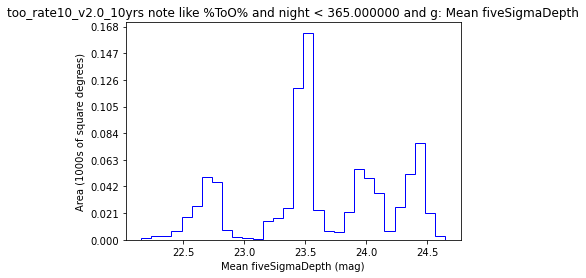

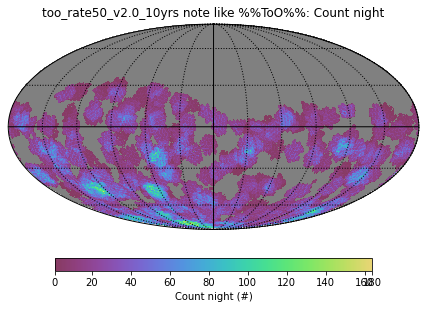

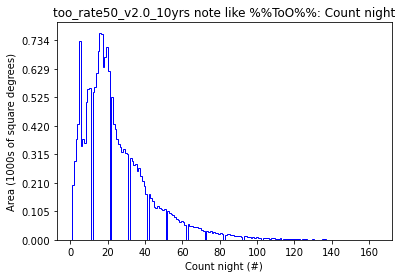

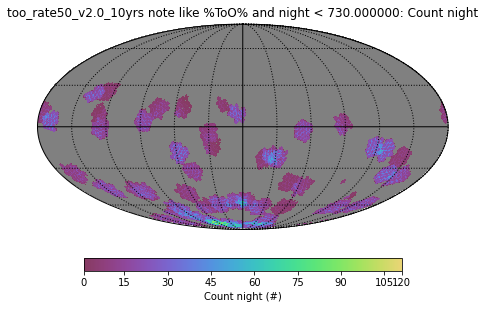

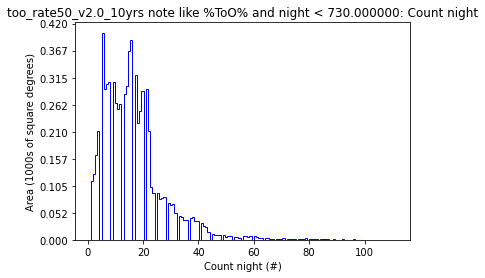

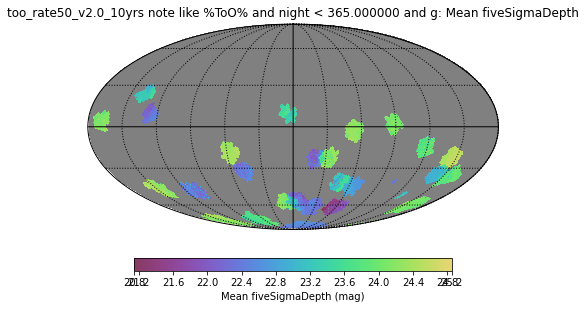

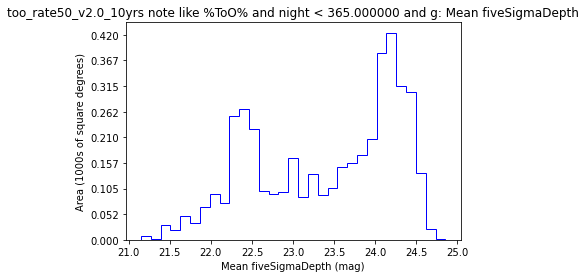

In [2]:
for filename in ['too_rate10_v2.0_10yrs.db', 'too_rate50_v2.0_10yrs.db']:
    name = os.path.basename(filename).replace('.db','')
    conn = maf.db.OpsimDatabase(filename)
    outDir = 'temp'
    resultsDb = maf.db.ResultsDb(outDir=outDir)


    bundleList = []
    # Select observations that are labeled as ToO
    sql = 'note like "%%ToO%%" and night < %f' % (365*2)
    metric = maf.metrics.CountMetric('night', units='#')
    slicer = maf.slicers.HealpixSlicer()
    bundleList.append(maf.MetricBundle(metric, slicer, sql, runName=name))

    sql = 'note like "%%ToO%%"' 

    bundleList.append(maf.MetricBundle(metric, slicer, sql, runName=name))

    sql = 'note like "%%ToO%%" and night < %f and filter="g"' % 365
    metric = maf.metrics.MeanMetric('fiveSigmaDepth')
    bundleList.append(maf.MetricBundle(metric, slicer, sql, runName=name))


    bd = maf.metricBundles.makeBundlesDictFromList(bundleList)
    bg = maf.metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
    bg.runAll()
    bg.plotAll(closefigs=False)


In [24]:
# Let's look at the events that were simulated
run_name = 'too_rate10_v2.0_10yrs'
conn = sqlite3.connect('%s.db' % run_name)
df = pd.read_sql('select * from events;', conn)

In [6]:
df

,index,mjd_start,ra,dec,expires
0,0,60238.169533,0.197475,-0.288029,60241.169533
1,1,60293.184865,3.998685,0.982199,60296.184865
2,2,60310.843360,1.975157,0.743329,60313.843360
3,3,60343.604073,3.195444,-0.922491,60346.604073
4,4,60383.192673,5.702408,-0.214499,60386.192673
...,...,...,...,...,...
95,95,63690.484004,2.194148,-0.044501,63693.484004
96,96,63744.971001,4.561314,-0.570422,63747.971001
97,97,63759.407853,5.636710,0.604509,63762.407853
98,98,63760.595735,5.573728,-0.248325,63763.595735


In [7]:
# so, we could loop over all of those and make some criteria for if we think we would have discovered the ToO.

In [25]:
# Look at distribution of number of observations per event
df = pd.read_sql('select * from observations;', conn)

In [10]:
notes = np.unique(df['note'])
too_notes = [note for note in notes if 'ToO' in note]

In [12]:
len(too_notes)

170

In [51]:
too_notes = np.unique([note.split('_')[0] for note in too_notes])

too_label = np.array([note.split('_')[0] for note in df['note']])

In [52]:
# a very dumb loop
nobs = []
for note in too_notes:
    nobs.append(np.size(np.where(too_label == note)[0]))

Text(0, 1.75, '13039 observations of \n49 unique events')

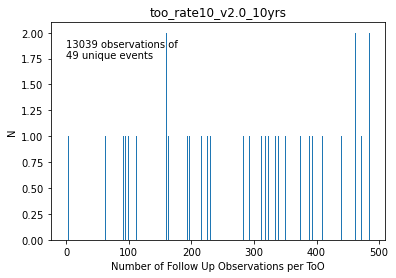

In [59]:
fig, ax = plt.subplots()
h = ax.hist(nobs, bins=np.arange(-1,np.max(nobs)+2)+0.5)
ax.set_xlabel('Number of Follow Up Observations per ToO')
ax.set_ylabel('N')
ax.set_title(run_name)
ax.annotate('%i observations of \n%i unique events' % (np.sum(nobs), len(too_notes)), (0,1.75))

In [3]:
run_name = 'too_rate50_v2.0_10yrs'
conn = sqlite3.connect('%s.db' % run_name)
df = pd.read_sql('select * from observations;', conn)
notes = np.unique(df['note'])
too_notes = [note for note in notes if 'ToO' in note]
too_notes = np.unique([note.split('_')[0] for note in too_notes])

too_label = np.array([note.split('_')[0] for note in df['note']])

nobs = []
for note in too_notes:
    nobs.append(np.size(np.where(too_label == note)[0]))
    


Text(120, 6, '56877 observations of \n230 unique events')

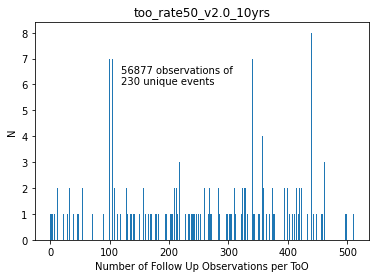

In [4]:
fig, ax = plt.subplots()
h = ax.hist(nobs, bins=np.arange(-1,np.max(nobs)+2)+0.5)
ax.set_xlabel('Number of Follow Up Observations per ToO')
ax.set_ylabel('N')
ax.set_title(run_name)
ax.annotate('%i observations of \n%i unique events' % (np.sum(nobs), len(too_notes)), (120,6))
